## Representações no domínio do tempo e da frequência

###1

carregar pasta com arquivos de áudio do github e alocar na pasta '/content/audio/' do Google Colab

(se for rodar em sua máquina, coloque na pasta de sua preferência [ex: '~/audios'])

In [1]:
!git clone https://github.com/zepadovani/2022s2-sonologia_aula_05 /content/audio

Cloning into '/content/audio'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [2]:
import matplotlib.pyplot as plt ## para plotar formas de onda/espectros
import librosa                  ## para calcular transformadas de Fourier, etc.
import librosa.display          ## para plotar audio processado pelo librosa
import IPython                  ## para visualizar/tocar coisas no Google Colab
import numpy as np              ## operações em vetores


In [3]:
plt.rcParams["figure.figsize"] = (20,9)

###2

Carregar arquivo de áudio 'sino_curto.wav'

In [4]:
filename = '/content/audio/sino_curto.wav'
y, sr = librosa.load(filename, sr=44100)

### 3
plotar forma de onda e criar player

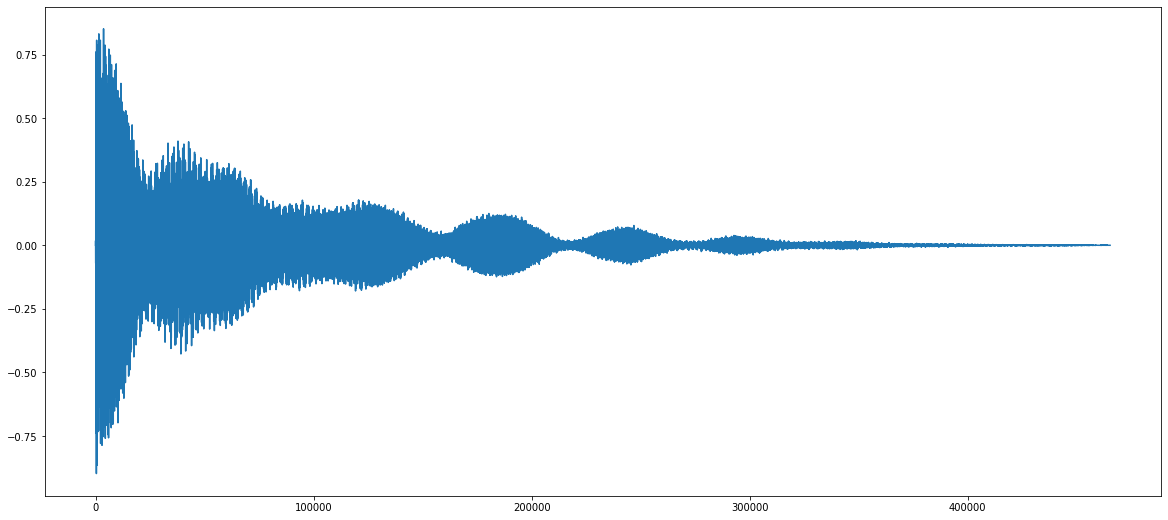

In [12]:
plt.plot(y)
plt.show()

# Play wave
IPython.display.Audio(filename)

### 4
parametros gerais de analise

In [19]:
lenTime = len(y)/sr                   ## duração em segundos do arquivo
windowsize = 2048                     ## tamanho da janela em samples
overlaps = 4                          ## numero de overlaps
hopsize = int(windowsize/overlaps)    ## distancia entre janelas em numero de samples
window_dur = 1000*windowsize/sr       ## tamanho da janela em milissegundos
hop_dur = 1000*hopsize/sr             ## distancia entre janelas em milissegundos
print("""Window size in samples: {0}\nOverlaps: {1}\nHop size in samples: {2}\nWindow duration in ms: {3:.2f}\nHop duration in ms: {4:.2f}""".format(windowsize, overlaps, hopsize,window_dur,hop_dur))

Window size in samples: 2048
Overlaps: 4
Hop size in samples: 512
Window duration in ms: 46.44
Hop duration in ms: 11.61


### 5
Análise (FFT)

In [20]:
D = librosa.stft(y,n_fft=windowsize,hop_length=hopsize)  ## FFT amplitude linear
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)    ## FFT amplitude em dB

pltFreqs = librosa.fft_frequencies(sr=sr, n_fft=windowsize) ## rotulos y
pltTimes = np.linspace(0,lenTime,len(np.transpose(D)),endpoint=False) ## rotulos x


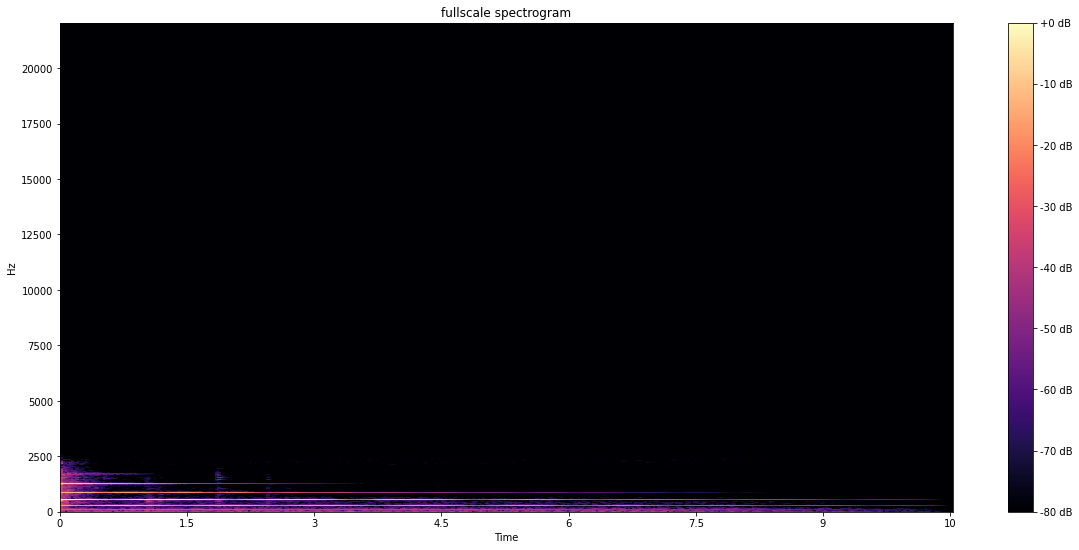

In [15]:
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='linear', ax=ax, y_coords=pltFreqs, x_coords=pltTimes)

ax.set(title='fullscale spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

(0.0, 10.551133786848073)

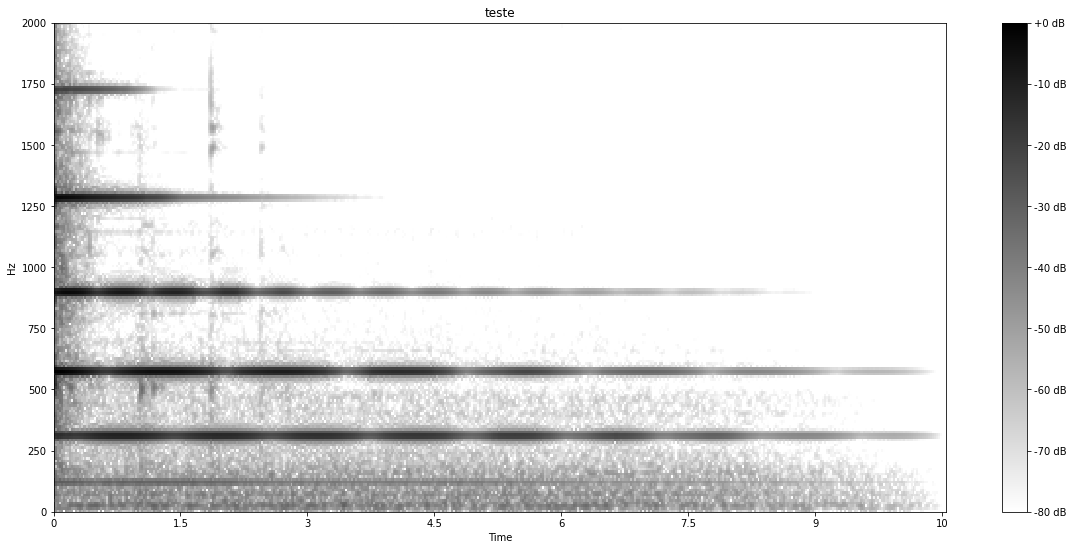

In [17]:
min_freq_to_plot = 0         ## em Hertz
max_freq_to_plot = 2000
min_time_to_plot = 0         ## em segundos
max_time_to_plot = lenTime   

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='linear', ax=ax, y_coords=pltFreqs, x_coords=pltTimes,  cmap='binary') #cmap='Greys'
ax.set(title='teste')
fig.colorbar(img, ax=ax, format="%+2.f dB")

# tick_frames = librosa.time_to_frames(np.linspace(0, 1.0, 20))
# plt.xlim([0, tick_frames[-1]])

pfreqs = librosa.fft_frequencies(sr,windowsize)
#max_bin = np.flatnonzero(pfreqs >= 24)[0]

plt.ylim([min_freq_to_plot, max_freq_to_plot])
plt.xlim([min_time_to_plot, max_time_to_plot])

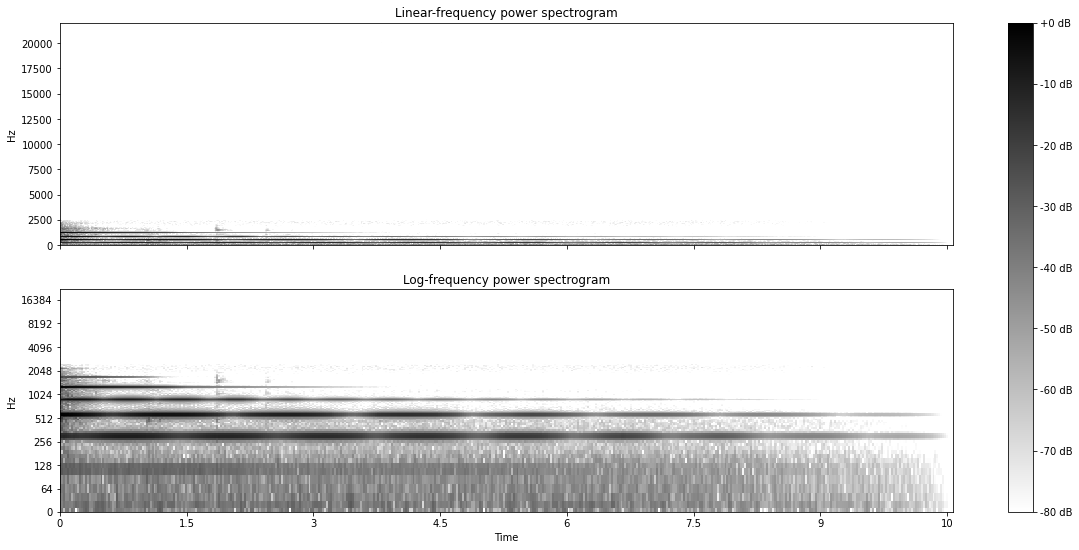

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0], cmap='gist_yarg')
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hopsize)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hopsize, x_axis='time', ax=ax[1], cmap='binary')
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

(0.0, 10.551133786848073)

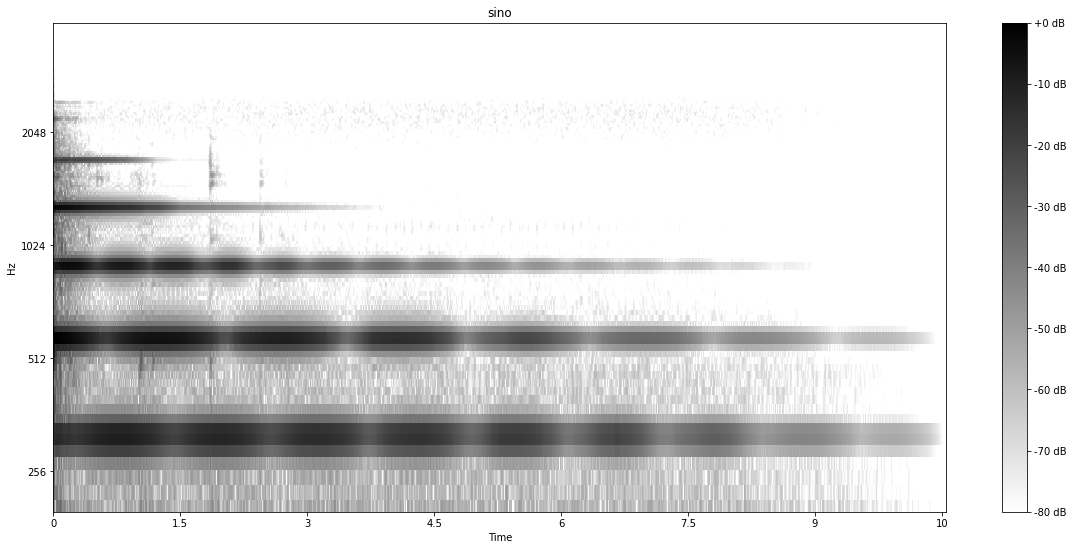

In [21]:
min_freq_to_plot = 200         ## em Hertz
max_freq_to_plot = 4000
min_time_to_plot = 0         ## em segundos
max_time_to_plot = lenTime   

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=ax, y_coords=pltFreqs, x_coords=pltTimes,  cmap='binary') #cmap='Greys'
ax.set(title='sino')
fig.colorbar(img, ax=ax, format="%+2.f dB")

# tick_frames = librosa.time_to_frames(np.linspace(0, 1.0, 20))
# plt.xlim([0, tick_frames[-1]])

pfreqs = librosa.fft_frequencies(sr,windowsize)
#max_bin = np.flatnonzero(pfreqs >= 24)[0]

plt.ylim([min_freq_to_plot, max_freq_to_plot])
plt.xlim([min_time_to_plot, max_time_to_plot])

array([0.00000000e+00, 1.07666016e+01, 2.15332031e+01, ...,
       2.20284668e+04, 2.20392334e+04, 2.20500000e+04])